**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy import stats

**LOADING DATASET**

In [2]:
df = pd.read_excel("C://Users//AMIT//Downloads//Game.xlsx")
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,16,Luis García,37,https://cdn.sofifa.org/players/4/19/16.png,Spain,https://cdn.sofifa.org/flags/45.png,71,71,KAS Eupen,https://cdn.sofifa.org/teams/2/light/2013.png,...,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M
1,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
2,80,E. Belözoğlu,37,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,...,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
3,164,G. Pinzi,37,https://cdn.sofifa.org/players/4/19/164.png,Italy,https://cdn.sofifa.org/flags/27.png,70,70,Padova,https://cdn.sofifa.org/teams/2/light/110912.png,...,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K
4,657,D. Vaughan,35,https://cdn.sofifa.org/players/4/19/657.png,Wales,https://cdn.sofifa.org/flags/50.png,66,66,Notts County,https://cdn.sofifa.org/teams/2/light/1937.png,...,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,246609,J. Requena,19,https://cdn.sofifa.org/players/4/19/246609.png,Argentina,https://cdn.sofifa.org/flags/52.png,57,72,Newell's Old Boys,https://cdn.sofifa.org/teams/2/light/110396.png,...,58.0,57.0,53.0,58.0,11.0,7.0,6.0,12.0,11.0,€468K
18203,246613,J. Zwarts,19,https://cdn.sofifa.org/players/4/19/246613.png,Netherlands,https://cdn.sofifa.org/flags/34.png,62,77,Feyenoord,https://cdn.sofifa.org/teams/2/light/246.png,...,51.0,18.0,22.0,17.0,8.0,12.0,8.0,7.0,6.0,€1.3M
18204,246616,José Uche,18,https://cdn.sofifa.org/players/4/19/246616.png,Spain,https://cdn.sofifa.org/flags/45.png,58,69,SD Huesca,https://cdn.sofifa.org/teams/2/light/110839.png,...,43.0,59.0,57.0,48.0,13.0,12.0,9.0,14.0,7.0,€432K
18205,246617,Javi Mier,19,https://cdn.sofifa.org/players/4/19/246617.png,Spain,https://cdn.sofifa.org/flags/45.png,62,76,Real Oviedo,https://cdn.sofifa.org/teams/2/light/110827.png,...,55.0,35.0,48.0,42.0,11.0,7.0,11.0,10.0,7.0,€1.4M


In [5]:
df["Wage"]=df["Wage"].str.replace("€","")
df["Wage"]=df["Wage"].str.replace("K","").astype(float)*1000
df["Wage"]

0         6000.0
1        21000.0
2        23000.0
3         2000.0
4         4000.0
          ...   
18202     1000.0
18203     1000.0
18204     1000.0
18205     1000.0
18206     1000.0
Name: Wage, Length: 18207, dtype: float64

**Q1 Outlier Detection for Wages**

*How can we identify outliers in the Wage column using statistical methods? 
Describe the steps, process, and logic behind the chosen method (e.g., IQR or Z-score). 
What insights can be derived from these outliers regarding player valuation?*

In [7]:
def outliers(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_boundary=Q1-1.5*IQR
    Upper_boundary=Q3+1.5*IQR
    outliers=(df[column]<Lower_boundary)|(df[column]>Upper_boundary)
    return outliers
df[outliers(df, "Wage")]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,80,E. Belözoğlu,37,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,...,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
6,1179,G. Buffon,40,https://cdn.sofifa.org/players/4/19/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M
7,2147,M. Stekelenburg,35,https://cdn.sofifa.org/players/4/19/2147.png,Netherlands,https://cdn.sofifa.org/flags/34.png,73,73,Everton,https://cdn.sofifa.org/teams/2/light/7.png,...,59.0,9.0,15.0,14.0,71.0,72.0,76.0,73.0,73.0,€1.8M
17,9014,A. Robben,34,https://cdn.sofifa.org/players/4/19/9014.png,Netherlands,https://cdn.sofifa.org/flags/34.png,84,84,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,85.0,30.0,26.0,26.0,10.0,8.0,11.0,5.0,15.0,€25.6M
43,20775,Quaresma,34,https://cdn.sofifa.org/players/4/19/20775.png,Portugal,https://cdn.sofifa.org/flags/38.png,84,84,Beşiktaş JK,https://cdn.sofifa.org/teams/2/light/327.png,...,80.0,29.0,17.0,13.0,12.0,14.0,10.0,5.0,15.0,€29.5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17168,244544,B. Alıcı,21,https://cdn.sofifa.org/players/4/19/244544.png,Turkey,https://cdn.sofifa.org/flags/48.png,73,80,Fenerbahçe SK,https://cdn.sofifa.org/teams/2/light/326.png,...,65.0,42.0,30.0,30.0,10.0,7.0,9.0,8.0,12.0,€11.6M
17567,245221,O. Abdulrahman,26,https://cdn.sofifa.org/players/4/19/245221.png,United Arab Emirates,https://cdn.sofifa.org/flags/190.png,77,78,Al Hilal,https://cdn.sofifa.org/teams/2/light/605.png,...,68.0,46.0,26.0,30.0,12.0,13.0,14.0,11.0,8.0,€18.6M
17579,245238,Javi Sánchez,21,https://cdn.sofifa.org/players/4/19/245238.png,Spain,https://cdn.sofifa.org/flags/45.png,67,79,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,55.0,64.0,67.0,65.0,11.0,15.0,13.0,8.0,13.0,€2.7M
17606,245279,Reguilón,21,https://cdn.sofifa.org/players/4/19/245279.png,Spain,https://cdn.sofifa.org/flags/45.png,68,80,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,64.0,66.0,68.0,68.0,11.0,14.0,9.0,5.0,12.0,€3.2M


In [9]:
ol = df[outliers(df, "Wage")]
ol

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,80,E. Belözoğlu,37,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,...,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
6,1179,G. Buffon,40,https://cdn.sofifa.org/players/4/19/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M
7,2147,M. Stekelenburg,35,https://cdn.sofifa.org/players/4/19/2147.png,Netherlands,https://cdn.sofifa.org/flags/34.png,73,73,Everton,https://cdn.sofifa.org/teams/2/light/7.png,...,59.0,9.0,15.0,14.0,71.0,72.0,76.0,73.0,73.0,€1.8M
17,9014,A. Robben,34,https://cdn.sofifa.org/players/4/19/9014.png,Netherlands,https://cdn.sofifa.org/flags/34.png,84,84,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,85.0,30.0,26.0,26.0,10.0,8.0,11.0,5.0,15.0,€25.6M
43,20775,Quaresma,34,https://cdn.sofifa.org/players/4/19/20775.png,Portugal,https://cdn.sofifa.org/flags/38.png,84,84,Beşiktaş JK,https://cdn.sofifa.org/teams/2/light/327.png,...,80.0,29.0,17.0,13.0,12.0,14.0,10.0,5.0,15.0,€29.5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17168,244544,B. Alıcı,21,https://cdn.sofifa.org/players/4/19/244544.png,Turkey,https://cdn.sofifa.org/flags/48.png,73,80,Fenerbahçe SK,https://cdn.sofifa.org/teams/2/light/326.png,...,65.0,42.0,30.0,30.0,10.0,7.0,9.0,8.0,12.0,€11.6M
17567,245221,O. Abdulrahman,26,https://cdn.sofifa.org/players/4/19/245221.png,United Arab Emirates,https://cdn.sofifa.org/flags/190.png,77,78,Al Hilal,https://cdn.sofifa.org/teams/2/light/605.png,...,68.0,46.0,26.0,30.0,12.0,13.0,14.0,11.0,8.0,€18.6M
17579,245238,Javi Sánchez,21,https://cdn.sofifa.org/players/4/19/245238.png,Spain,https://cdn.sofifa.org/flags/45.png,67,79,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,55.0,64.0,67.0,65.0,11.0,15.0,13.0,8.0,13.0,€2.7M
17606,245279,Reguilón,21,https://cdn.sofifa.org/players/4/19/245279.png,Spain,https://cdn.sofifa.org/flags/45.png,68,80,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,64.0,66.0,68.0,68.0,11.0,14.0,9.0,5.0,12.0,€3.2M


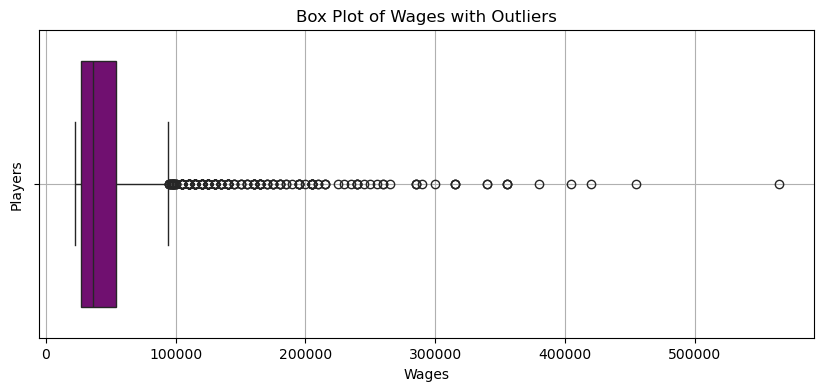

In [11]:
plt.figure(figsize=(10,4))
sns.boxplot(x=ol["Wage"], color="purple")
plt.title("Box Plot of Wages with Outliers")
plt.ylabel("Players")
plt.xlabel("Wages")
plt.grid(True)
plt.show()

*In conclusion, the data shows a distribution where a large number of individuals earn a low wage, 
while a smaller number of individuals earn significantly higher wages, which are considered statistical outliers.* 

**Q2 Distribution Analysis of Potential**

*What is the distribution of the Potential column? Is it normal, skewed, or multimodal? 
Visualize and describe the distribution, and fit a theoretical distribution (e.g., normal) to assess its fit*

**1-STEP(VISUALIZE THE DISTRIBUTION)**

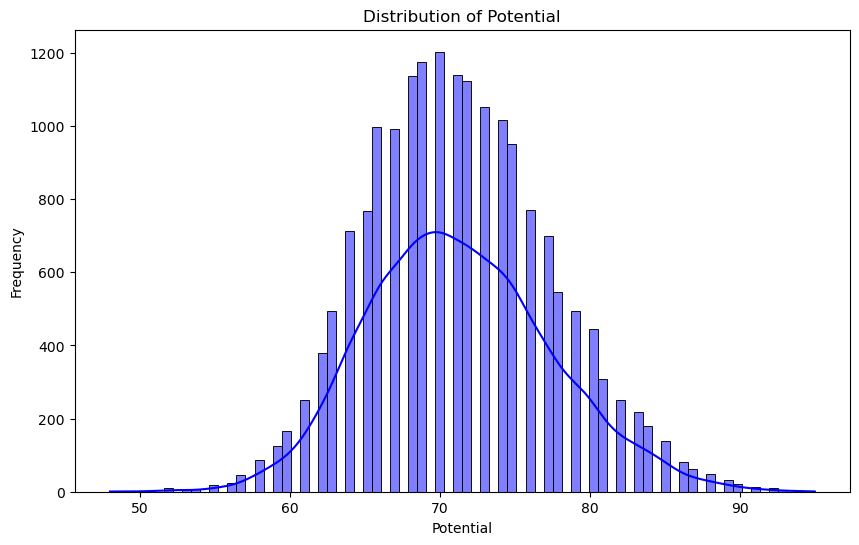

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df["Potential"],color="blue",kde=True)
plt.title("Distribution of Potential")
plt.xlabel("Potential")
plt.ylabel("Frequency")
plt.show()

**2-STEP(DESCRIBE THE DISTRIBUTION)**

In [15]:
skewness = df["Potential"].skew()
skewness

0.2661535963828859

In [17]:
kurtosis = df["Potential"].kurt()
kurtosis

0.03582580838729976

**3-STEP(FIT A THEORETICAL DISTRIBUTION)**

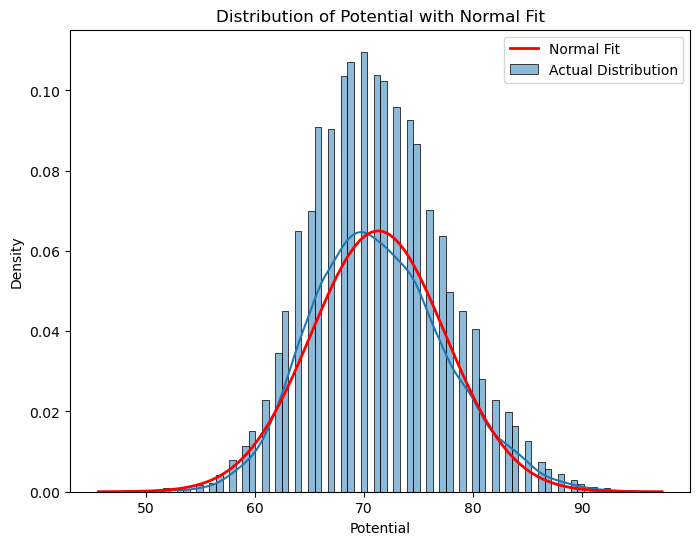

In [25]:
mu, std = norm.fit(df["Potential"])

plt.figure(figsize=(8, 6))
sns.histplot(df["Potential"],kde=True, stat="density", label="Actual Distribution")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label="Normal Fit")
plt.title("Distribution of Potential with Normal Fit")
plt.xlabel("Potential")
plt.ylabel("Density")
plt.legend()
plt.show()

*Shape Comparison: The Actual Distribution is somewhat bell-shaped like the Normal Fit but doesn't perfectly match the normal curve
Center and Spread: The distribution is centered around a Potential of approximately 70, with most values spread between 60 and 80
The distribution of "Potential" is roughly symmetric but might not be perfectly normal*

**Q3 NORMAL VS. STUDENT'S t-DISTRIBUTION**

*Compare the Normal and Student’s t-distributions using the Potential column. Explain the theoretical differences between these distributions and illustrate how they apply to the Potential data. What implications do these differences have for small sample sizes?*

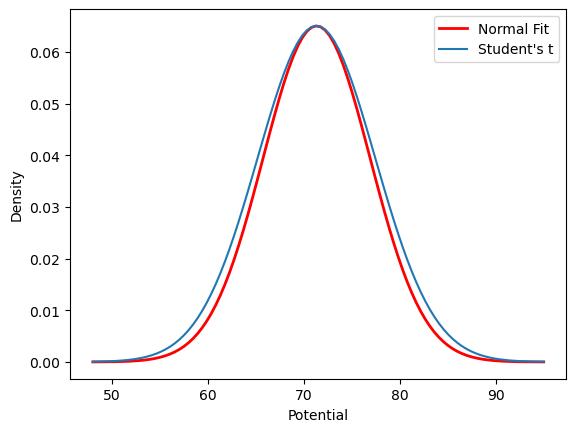

In [37]:
x = np.linspace(df["Potential"].min(), df["Potential"].max(), 100)
plt.plot(x, p, 'r', linewidth=2, label="Normal Fit")
plt.plot(x, stats.t.pdf(x, df=len(df["Potential"])-1, loc=df["Potential"].mean(), scale=df["Potential"].std()), label="Student's t")
plt.xlabel("Potential")
plt.ylabel("Density")
plt.legend()
plt.show()

*INTERPRETATION:
THE KEY DIFFRENCE IS THAT THE STUDENTS t'S DISTRIBUTION HAS "HEAVIER" OR "FLATTER" TAILS, MEANING IT IS MORE PRONE TO PRODUCING VALUES 
THAT FALL FAR FROM THE MEAN. THIS MAKES IT MORE SUITABLE FOR ANALYZING DATA FROM SMALLER SAMPLE SIZES OR WHEN THE POPULATION STANDARD DEVIATION IS UNKNOWN*

**Q4 NORMAL VS. STANDARD NORMAL DISTRIBUTION**

*Explain the difference between a normal distribution and a standard normal distribution using the Potential column. Standardize the Potential data and compare it to the standard normal distribution. How does this transformation aid in statistical analysis?*

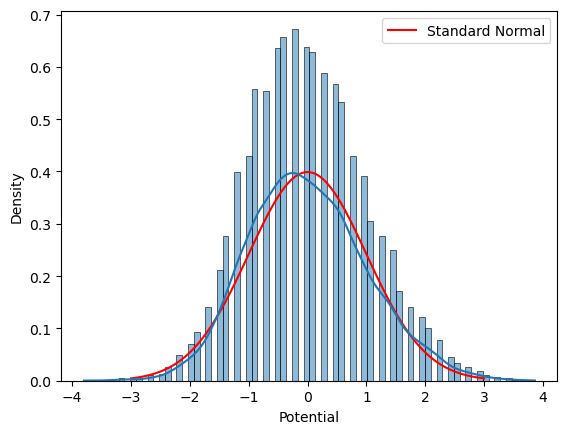

In [97]:
# Standardize Potential
standardized = (df["Potential"] - df["Potential"].mean()) / df["Potential"].std()

x = np.linspace(-3, 3, 100)
plt.plot(x,stats.norm.pdf(x), "r",label="Standard Normal")
sns.histplot(standardized, kde=True, stat="density")
plt.legend()
plt.show()

**Q6 VALIDATION OF THE CENTRAL LIMIT THEORAM** 

*Demonstrate the Central Limit Theorem using the Potential column. How does the distribution of sample means behave as sample size increases? Provide visualizations to support the analysis and explain the implications of the CLT for statistical inference.*

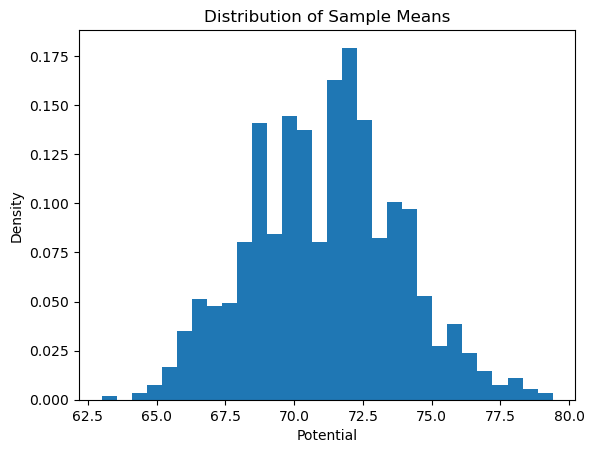

In [76]:
sample_means = [df["Potential"].sample(n=5, replace=True).mean() for _ in range(1000)]
plt.hist(sample_means, bins=30, density=True)
plt.title("Distribution of Sample Means")
plt.xlabel("Potential")
plt.ylabel("Density")
plt.show()

*INTERPRETATION: WHICH STATES THAT AS THE SAMPLE SIZE INCREASES,THE SAMPLING DISTRIBUTION OF THE MEAN WILL BECOME MORE NORMAL AND ITS VARIANCE WILL DECREASE*

**Q7 CORRELATION ANALYSIS**

*Is there a significant correlation between Potential and Wage? Use statistical measures (e.g., Pearson correlation) and visualizations to explore this relationship. What does this imply about player valuation in the football market?*

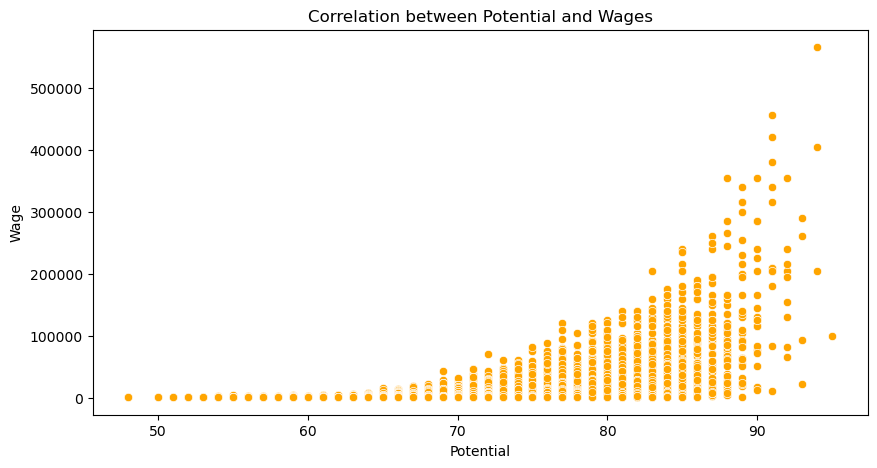

In [95]:
corr = df["Potential"].corr(df["Wage"])
plt.figure(figsize=(10,5))
sns.scatterplot(x="Potential", y="Wage", data=df,color="orange")
plt.title("Correlation between Potential and Wages")
plt.show()

In [107]:
df.groupby(["Potential","Name"])[["Wage"]].max()

Wage
Potential Name                       
48        K. Pilkington        1000.0
          Y. Uchimura          1000.0
50        A. Suzuki            1000.0
          J. Miszczuk          1000.0
51        Teng Shangkun        1000.0
...                               ...
93        Neymar Jr          290000.0
94        Cristiano Ronaldo  405000.0
          L. Messi           565000.0
          P. Dybala          205000.0
95        K. Mbappé          100000.0

[18147 rows x 1 columns]

**Q8 AGE DISTRIBUTION BY POSITION**

*How does player age vary across different positions (e.g., GK, ST, CM)? Analyze the distribution of Age by Position and identify any positions with notably older or younger players. What might explain these differences?**

C:\Users\AMIT\AppData\Local\Temp\ipykernel_3912\1287469830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Position", y="Age", data=df,palette="Spectral")


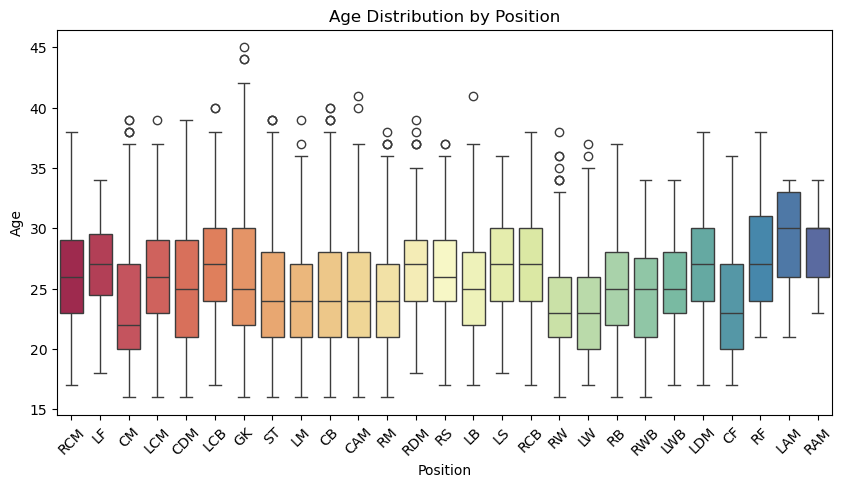

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Position", y="Age", data=df,palette="Spectral")
plt.title("Age Distribution by Position")
plt.xticks(rotation=45)
plt.show()

* Goalkeepers (GK) and Center Backs (CB): These positions have a wider age range compared to other positions, with some of the oldest players in the dataset. 
* Center Midfielders (CM): The age distribution for central midfielders is relatively consistent and falls within a narrow range, with a median age around 25. 
* Wingers (LW, RW): The age distribution for wingers is generally lower than for central positions, with a median age below 25. 
* Fullbacks (LWB, RWB): These positions also show a relatively narrow age distribution, with a median age similar to that of the wingers. 
* Strikers (ST): The age distribution for strikers is also concentrated, with a median age around 25.

**Q9 NATIONALITY REPRESENTATION**

*Which nationalities are most represented in the dataset? Analyze the distribution of players by Nationality and identify the top 10 countries. What insights can this provide about global football talent distribution?*

In [50]:
top_nationalities = df["Nationality"].value_counts().head(10)
top_nationalities

Nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: count, dtype: int64

C:\Users\AMIT\AppData\Local\Temp\ipykernel_19424\2630907183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nationalities.index, y=top_nationalities.values,palette="colorblind")


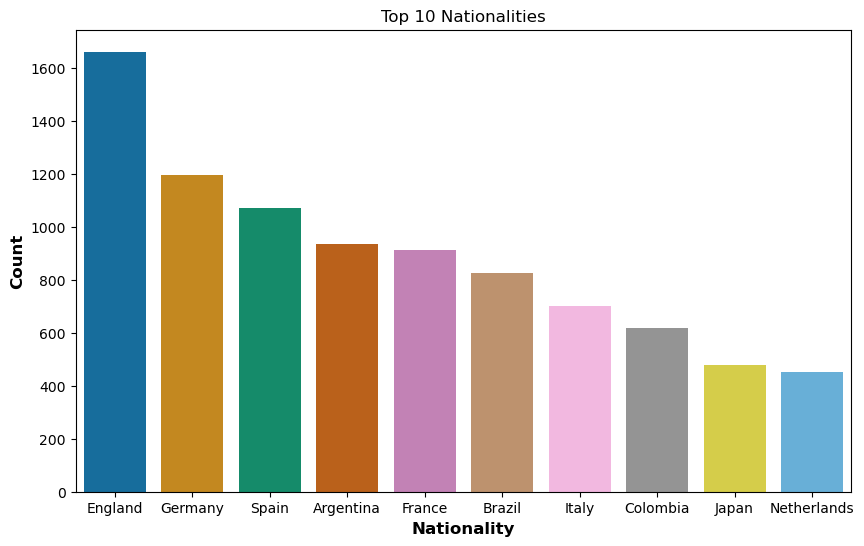

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values,palette="colorblind")
plt.title("Top 10 Nationalities")
plt.xlabel("Nationality",weight="bold",fontsize=12)
plt.ylabel("Count",weight="bold",fontsize=12)
plt.show()

**Q10 SKILL METRICS AND PERFORMANCE**

*How do key skill metrics (e.g., Dribbling, Finishing, Passing) correlate with Overall and Potential ratings? Identify which skills have the strongest influence on player performance ratings and visualize these relationships*

In [85]:
corr_matrix = df[["Dribbling", "Finishing", "Overall", "Potential"]].corr()
corr_matrix

,Dribbling,Finishing,Overall,Potential
Dribbling,1.000000,0.824337,0.372426,0.315019
Finishing,0.824337,1.000000,0.332515,0.243355
Overall,0.372426,0.332515,1.000000,0.660939
Potential,0.315019,0.243355,0.660939,1.000000


*THE CORRELATION BETWEEN DRIBBLING AND FINISHING IS "0.824337"*
*THE CORRELATION BETWEEN OVERALL AND POTENTIAL IS "0.660939"*

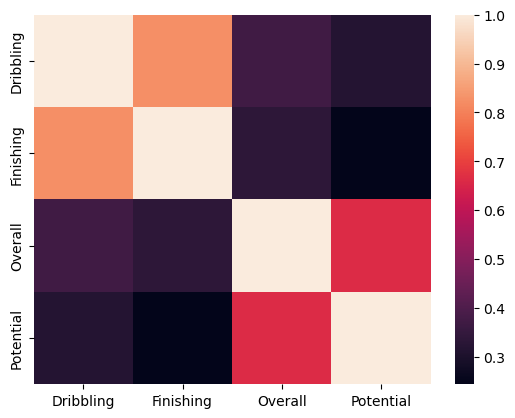

In [87]:
sns.heatmap(corr_matrix, annot=False)
plt.show()

*A correlation coefficient measures the strength and direction of a linear relationship between two variables. A value closer to +1 indicates a strong positive relationship, a value closer to -1 indicates a strong negative relationship, and a value closer to 0 indicates a weak or no relationship.*

**Q12 WAGE DISTRIBUTION BY CLUB**

*How does the Wage distribution vary across different clubs? Identify clubs with the highest and lowest average wages and explore whether these align with player Potential or Overall ratings. Use visualizations to support the analysis*

In [66]:
club_wages = df.groupby("Club")["Wage"].mean().sort_values(ascending=False)
club_wages

Club
Real Madrid          152030.303030
FC Barcelona         146575.757576
Juventus             131680.000000
Manchester City      113363.636364
Manchester United    102757.575758
                         ...      
PFC CSKA Moscow        1000.000000
Bray Wanderers         1000.000000
IF Brommapojkarna      1000.000000
Boyacá Chicó FC        1000.000000
SK Slavia Praha        1000.000000
Name: Wage, Length: 651, dtype: float64

In [68]:
top_clubs = club_wages.head(10)
top_clubs

Club
Real Madrid          152030.303030
FC Barcelona         146575.757576
Juventus             131680.000000
Manchester City      113363.636364
Manchester United    102757.575758
Chelsea               98454.545455
Liverpool             87939.393939
Tottenham Hotspur     79484.848485
FC Bayern München     78827.586207
Arsenal               78424.242424
Name: Wage, dtype: float64

C:\Users\AMIT\AppData\Local\Temp\ipykernel_19424\3226698754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clubs.index,y=top_clubs.values,palette="Set2")


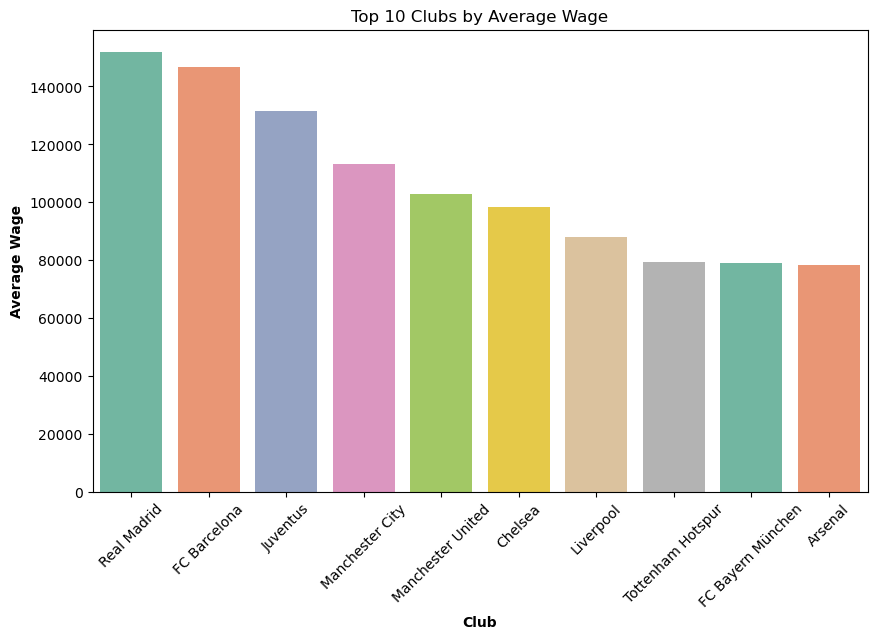

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_clubs.index,y=top_clubs.values,palette="Set2")
plt.xlabel("Club",weight="bold")
plt.ylabel("Average Wage",weight="bold")
plt.title("Top 10 Clubs by Average Wage")
plt.xticks(rotation=45)
plt.show()

In [39]:
bottom_clubs = club_wages.tail(10)
bottom_clubs

Club
Bohemian FC          1000.0
Shamrock Rovers      1000.0
Viktoria Plzeň       1000.0
HJK Helsinki         1000.0
PAOK                 1000.0
PFC CSKA Moscow      1000.0
Bray Wanderers       1000.0
IF Brommapojkarna    1000.0
Boyacá Chicó FC      1000.0
SK Slavia Praha      1000.0
Name: Wage, dtype: float64

C:\Users\AMIT\AppData\Local\Temp\ipykernel_19424\3224987439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_clubs.index, y=bottom_clubs.values, palette="Set1")


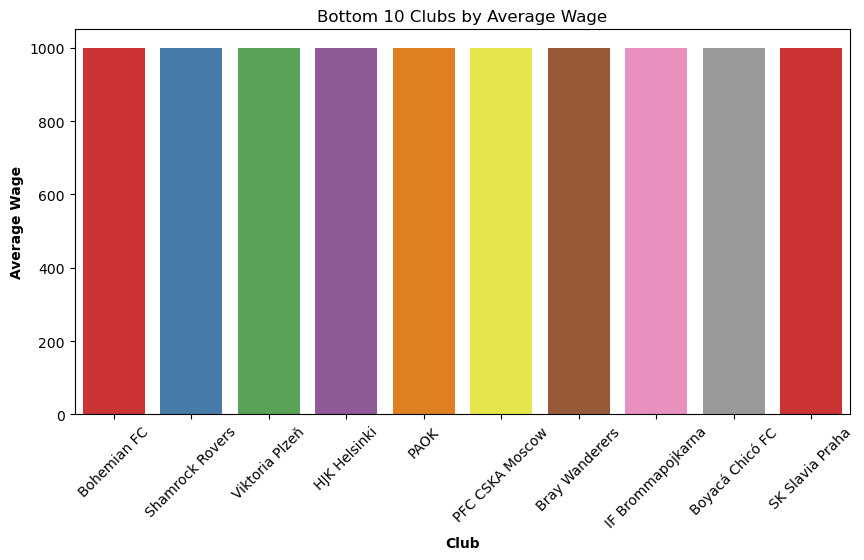

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x=bottom_clubs.index, y=bottom_clubs.values, palette="Set1")
plt.xlabel("Club",weight="bold")
plt.ylabel("Average Wage",weight="bold")
plt.title("Bottom 10 Clubs by Average Wage")
plt.xticks(rotation=45)
plt.show()

**Q13 POTENTIAL GROWTH ANALYSIS**

*Calculate the potential growth (Potential - Overall) for each player. Analyze the distribution of potential growth and identify which age groups or positions have the highest growth potential. What does this suggest for talent scouting?*

In [81]:
df["Potential_Growth"] = df["Potential"] - df["Overall"]
df["Potential_Growth"]


0         0
1         0
2         0
3         0
4         0
         ..
18202    15
18203    15
18204    11
18205    14
18206    23
Name: Potential_Growth, Length: 18207, dtype: int64

C:\Users\AMIT\AppData\Local\Temp\ipykernel_3912\3488430175.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age", y="Potential_Growth", data=df,palette="tab10")


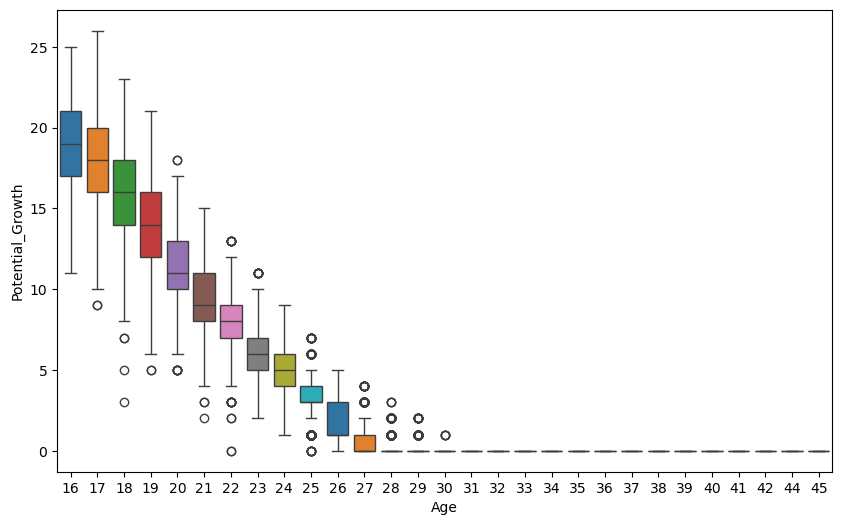

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Age", y="Potential_Growth", data=df,palette="tab10")
plt.show()

INTERPRETATION: Potential growth decreases as age increases. Younger ages (16-20) have higher potential growth (around 15-20), while older ages (25+) have lower potential growth (closer to 0-5).In short, the plot suggests that potential growth is higher in younger ages and tapers off as age increases.

**-----------------------------------------------------------CONCLUSION-------------------------------------------------------------------------------**

*Based on analysis of FIFA dataset, I have drawn several conclusions about player demographics, performance trends, and the factors that influence player value. These insights can be applied to real-world football, scouting, and player evaluation*

Player attributes and career development • Performance peaks in the late 20s: The average overall player rating generally increases with age and peaks between the mid-20s and early 30s. After this period, a decline in overall performance typically occurs. 
* Physical attributes decline with age: Younger players (early 20s) tend to have higher physical attributes like pace, acceleration, and stamina, which decrease as they age. However, tactical and technical skills often improve with experience. 
* Skill profiles differ by position: Data analysis can identify the most crucial attributes for different positions. For example, pace and shooting are highly valued in forwards, while defending and physicality are key for defenders. 
* Potential versus age: Younger players often have higher potential ratings but lower current overall ratings. There is a strong negative correlation between a player's age and potential, reflecting that younger players have more room for growth. 